### Проведение анализа данных (EDA) на очищенных данных

- Данные предварительно были очищены от выбросов (от авторов с большим временем просмотра их видео во всех классах)
- Была проведена обработка признака event_timestamp. Дата и время разбиты на отдельные признаки, время переведено в формат местного в каждом регионе

### Визуализация и статистики нового датасета:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [15]:

# Загрузка данных
df = pd.read_csv('clear_data_times_data.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,region,ua_device_type,ua_client_type,ua_os,ua_client_name,total_watchtime,rutube_video_id,viewer_uid,adjusted_time,title,category,duration,author_id,age,age_class,sex,date
0,Chelyabinsk,desktop,browser,Windows,Yandex Browser,1883,video_133074,10067243,08:40:58,Папа с особенностями. Мужское / Женское. Выпус...,Телепередачи,2456534,1009219,20,0,female,1
1,Bashkortostan Republic,smartphone,mobile app,Android,Rutube,512,video_362960,10245341,21:33:24,Comedy Club: Мальдивы | Андрей Бебуришвили,Юмор,519211,1006760,40,2,female,1
2,Moscow,smartphone,mobile app,Android,Rutube,1521,video_161610,10029092,23:03:42,Сергей Орлов-снял дом!!!,Разное,1522069,1058671,41,3,male,1
3,Moscow,smartphone,mobile app,Android,Rutube,71,video_116245,10452976,22:48:09,Ищем сокровища в Полевском | Уральская Флоренц...,Путешествия,1249920,1020020,38,2,female,1
4,Rostov,smartphone,mobile app,Android,Rutube,60,video_61152,10013813,04:11:51,День защиты детей. Мужское / Женское. Выпуск о...,Телепередачи,2465238,1009219,44,3,female,1


In [ ]:

# Преобразуем столбцы 'adjusted_time' и 'date' в тип datetime
df['adjusted_time'] = pd.to_datetime(df['adjusted_time'])
df['date'] = pd.to_datetime(df['date'])

# 1. Статистика пропусков в данных

# 2. Распределение целевых переменных (пол и возраст)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='sex')
plt.title('Распределение по полу')

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='age', bins=30, kde=True)
plt.title('Распределение по возрасту')
plt.show()

# 3. Время просмотра (total_watchtime) в зависимости от категориальных переменных
plt.figure(figsize=(16, 8))

plt.subplot(2, 2, 1)
sns.boxplot(data=df, x='ua_device_type', y='total_watchtime')
plt.title('Время просмотра по типу устройства')

plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='ua_os', y='total_watchtime')
plt.title('Время просмотра по ОС')

plt.subplot(2, 2, 3)
sns.boxplot(data=df, x='category', y='total_watchtime')
plt.xticks(rotation=90)
plt.title('Время просмотра по категориям видео')

plt.subplot(2, 2, 4)
sns.boxplot(data=df, x='ua_client_type', y='total_watchtime')
plt.title('Время просмотра по типу клиента')

plt.tight_layout()
plt.show()

# 4. Частотное распределение в категориях полов и возрастов
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='sex', hue='category')
plt.title('Частота категорий по полу')
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='age_class', hue='category')
plt.title('Частота категорий по возрастным группам')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

# 5. Временные классы (4-8, 8-12, 12-16, 16-20, 20-00)
df['hour'] = df['adjusted_time'].dt.hour

# Создадим временные классы
def time_class(hour):
    if 4 <= hour < 8:
        return '4-8'
    elif 8 <= hour < 12:
        return '8-12'
    elif 12 <= hour < 16:
        return '12-16'
    elif 16 <= hour < 20:
        return '16-20'
    else:
        return '20-00'

df['time_class'] = df['hour'].apply(time_class)

# Распределение полов по временным классам
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='time_class', hue='sex')
plt.title('Распределение полов по временным классам')
plt.show()

# Распределение возрастных классов по временным классам
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='time_class', hue='age_class')
plt.title('Распределение возрастных классов по временным классам')
plt.show()

# 6. Зависимость времени просмотра по авторам в зависимости от пола и возрастного класса
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='sex', y='total_watchtime', hue='author_id')
plt.title('Время просмотра по авторам (разделение по полу)')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='age_class', y='total_watchtime', hue='author_id')
plt.title('Время просмотра по авторам (разделение по возрастным классам)')

plt.tight_layout()
plt.show()

# 7. Средняя длительность просмотра видео по полу и возрастным классам
avg_watchtime_by_sex_age = df.groupby(['sex', 'age_class'])['total_watchtime'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=avg_watchtime_by_sex_age, x='age_class', y='total_watchtime', hue='sex')
plt.title('Средняя длительность просмотра видео по полу и возрастным классам')
plt.show()

# 8. Статистика количества уникальных видео по полу и возрастным классам
unique_videos_by_user = df.groupby('viewer_uid')['rutube_video_id'].nunique().reset_index()
unique_videos_by_user.columns = ['viewer_uid', 'unique_videos']

unique_videos_with_sex_age = df[['viewer_uid', 'sex', 'age_class']].drop_duplicates()
unique_videos_by_user = unique_videos_by_user.merge(unique_videos_with_sex_age, on='viewer_uid')

plt.figure(figsize=(12, 6))
sns.boxplot(data=unique_videos_by_user, x='age_class', y='unique_videos', hue='sex')
plt.title('Количество уникальных видео по полу и возрастным классам')
plt.show()

# 9. Частота категорий по полу и возрастным классам
category_freq_by_sex_age = df.groupby(['sex', 'age_class', 'category'])['rutube_video_id'].count().reset_index()
category_freq_by_sex_age.columns = ['sex', 'age_class', 'category', 'category_count']

plt.figure(figsize=(16, 8))
sns.barplot(data=category_freq_by_sex_age, x='age_class', y='category_count', hue='category')
plt.title('Частота категорий по полу и возрастным классам')
plt.xticks(rotation=90)
plt.show()

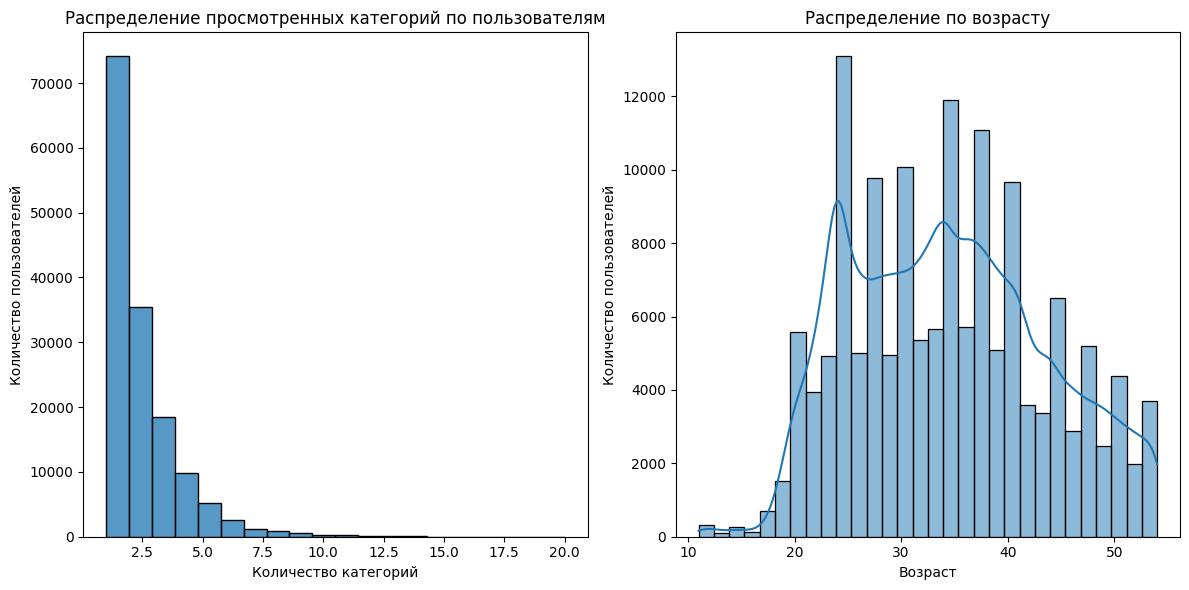

In [10]:
# Создание фигуры и осей для двух подграфиков
plt.figure(figsize=(12, 6))

# Первый график (подпольный 1 из 2) - распределение количества категорий на пользователя
plt.subplot(1, 2, 1)
# Группируем по пользователю и находим уникальные категории
user_categories = df.groupby('viewer_uid')['category'].unique()
# Считаем количество уникальных категорий для каждого пользователя
category_distribution = user_categories.apply(len)
# Строим график распределения
sns.histplot(category_distribution, bins=20)
plt.title('Распределение просмотренных категорий по пользователям')
plt.xlabel('Количество категорий')
plt.ylabel('Количество пользователей')

# Второй график (подпольный 2 из 2) - распределение по возрасту
plt.subplot(1, 2, 2)
dt =df.groupby('viewer_uid')['age'].median().reset_index()
dt.columns = ['viewer_uid', 'age']
sns.histplot(data=dt, x='age', bins=30, kde=True)
plt.title('Распределение по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')

# Показ графиков
plt.tight_layout()
plt.show()


Гипотеза: если в одно и то же время одного и того же дня пользователь смотрит видео с разных устройств, то это может быть семейный аккаунт и у таких пользователей почти не получится определить пол и возраст.

In [19]:
# Оставляем только часы и минуты из столбца adjusted_time
df['time'] = pd.to_datetime(df['adjusted_time'], format='%H:%M:%S').dt.strftime('%H:%M')

# Группируем данные по ID пользователя, номеру дня и времени до минут
# Считаем, сколько уникальных типов устройств использовалось в одно и то же время в течение одного дня
device_check = df.groupby(['viewer_uid', 'date', 'time'])['ua_device_type'].nunique().reset_index()

# Оставляем только те случаи, где использовалось больше одного устройства
multi_device_users = device_check[device_check['ua_device_type'] > 1]

# Выводим уникальные ID пользователей, которые смотрели с разных устройств одновременно
unique_ids = multi_device_users['viewer_uid'].unique()
num_unique_users = len(unique_ids)

# Выводим результат
print("ID пользователей, которые использовали разные устройства одновременно:", unique_ids)
print("Количество таких пользователей:", num_unique_users)

ID пользователей, которые использовали разные устройства одновременно: [10050935 10096153 10104184 10126611 10147404 10162814 10191470 10193154
 10250610 10250677 10251220 10251433 10303123 10395074 10395333 10415835
 10429148 10480599 10581019 10581409 10650042 10734058]
Количество таких пользователей: 22
